In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib
matplotlib.style.use('ggplot')

In [2]:
def remove_grid_lines(axs):
    """Remove the default grid lines from a collection of axies."""
    for ax in axs.flatten():
        ax.grid(False)

# Classifying Digits Using Fully Connected Neural Networks

In this sprint we will use tensorflow to classify images of digits.

You will need the following imports to complete this exercise.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib
matplotlib.style.use('ggplot')
```

## The MNIST Dataset

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is a classic case study in machine learning.  It was created by collecting handwriting samples from employees of the American Census Bureau, and American high school students.

-> Image of MNIST Form

The MNIST dataset is split into training and testing sets, each with a mix of samples from both the census employees and students.

1. Import the MNIST dataset into python using the following code.

```python
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
```

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0715 17:25:17.822734  5356 deprecation.py:323] From <ipython-input-3-a839aeb82f4b>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0715 17:25:17.826723  5356 deprecation.py:323] From C:\Users\brent\Anaconda2\envs\py36\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0715 17:25:17.827721  5356 deprecation.py:323] From C:\Users\brent\Anaconda2\envs\py36\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions 

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0715 17:25:18.125923  5356 deprecation.py:323] From C:\Users\brent\Anaconda2\envs\py36\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0715 17:25:18.127917  5356 deprecation.py:323] From C:\Users\brent\Anaconda2\envs\py36\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0715 17:25:18.189754  5356 deprecation.py:323] From C:\Users\brent\Anaconda2\envs\py36\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and wi

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The `mnist` object has a few attributes you will be interested in:
  - `mnist.train` constains the training dataset.
  - `mnist.test` constains the testing dataset.
  
Within each of these datasets there are two further attributes.  For example:
  - `mnist.train.images` contains the training images.
  - `mnist.train.labels` contains the training labels.

2. Determine the shape of the MNIST images and labels.  What does each dimension of the shapes mean?

In [4]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [5]:
print(mnist.train.labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Each MNIST image is **flattened** into a single dimensional array of 784 pixel intensities.  The true images are 28 pixels by 28 pixels.

3. Write a function to plot an MNIST digit on an axis.

```python
def plot_mnist_digit(ax, image, label):
    """Plot a greyscale image and label its class."""
    ...
```

The `image` argument should be a one dimensional array with 784 entries.  You will have to `reshape` it, and then use `imshow` to draw the picture.  In the title of the plot, indicate the true class of the digit (i.e., is it a zero, one, two, ..., nine?).

In [6]:
def plot_mnist_digit(ax, image, label):
    """Plot a greyscale image and label its class."""
    first_digit = image.reshape(28, 28)
    ax.imshow(first_digit, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Class: {}".format(label))

4. Create a 2 by 4 grid of MNIST digit plots using your function from above.

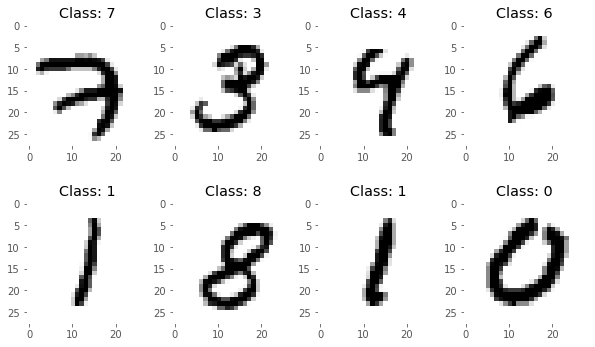

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(10, 6))

digit_labels = np.argmax(mnist.train.labels, axis=1)

for i, (image, label, ax) in enumerate(
    zip(mnist.train.images, digit_labels, axs.flatten())):
    plot_mnist_digit(ax, image, label)
    
remove_grid_lines(axs)

## Classifying Digits with a Simple Fully Connected Network

Now let's try our hand at classifying these images.  Our first attempt will be a simple neural network with no hidden layers.  This essentially means that each digit is classified based on a linear combination of its pixel intensities.

![Fully Connected Network With No Hidden Layers](img/nn-fc-small.png)

5. Create some placeholder tensors to hold the input data and labels.  Here's the solution for the labels to get you started:

```python
y = tf.placeholder(tf.float32, [None, 10])
```

You should think through what the `None` is trying to communicate.

In [8]:
# Placeholder for the input data, grayscale images.
x = tf.placeholder(tf.float32, [None, 28*28])
# Placeholder for input class labels.
y = tf.placeholder(tf.float32, [None, 10])

5. The weights connecting the onput layer to the output layer should form a 784 by 10 matrix.  Create a `tf.Variable` for holding this weight matrix.  Initialize the values in the matrix to zero.

In [9]:
# Weights.  There are 10 output classes, and one weight per (pixel, output class)
# combination.
W = tf.Variable(tf.zeros([28*28, 10]))

6. Create a `tf.Variable` for containing the biasies associated with the weights above.

In [10]:
# Biasies.  This is like an intercept term in a linear regression.  There is one
# per output class.
b = tf.Variable(tf.zeros([10]))

1. Create a tensorflow varaible `y_hat` for holding the predicted probabilities for the class labels.
  - You should *not* need a new `tf.Varaible`, this can be defined in terms of the varaibles you already have.
  - You will need to use `tf.matmul` and `tf.nn.softmax`.

In [11]:
# Output layer, probabilities of each class.
y_hat = tf.nn.softmax(tf.matmul(x, W) + b)

Now we need a loss function for our model.

1. Create a `cross_enthropy` tensor, this should be defined in terms of `y` and `y_hat`. 

In [12]:
# Our loss function.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

We will want to be able to monitor the performance of our model, both during training, and on the test dataset after training.

1. Create the following tensors:
  - `prediction`, continaing the class prediction for an image (use `tf.argmax`).
  - `correect_prediction`, a boolean tensor measuring if the predicted class is equal to the actual class (use `tf.equal`).
  - `accuracy`, containing the proportion of correctly predicted classes (use `tf.reduce_mean`).

In [13]:
prediction = tf.argmax(y_hat, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

1. Set up a tensorflow session for running your model graph.

In [14]:
# Set up our tensorflow session.
sess = tf.InteractiveSession()

1. Use `tf.GradientDescentOptimzer` to train your model.
  - Set the learning rate to a reasonable value.
  - You're *minimizing* the loss function.
  - Don't forget to use `tf.global_variables_initializer().run()` to initilize your graph before training the model.
  - You can use `batch_xs, batch_ys = mnist.train.next_batch(100)` to get 100 training examples for your stochastic descent.
  - `sess.run` takes a `feed_dict` argument where you can place your training examples in the `x` and `y` placeholders.
  - You may want to add a simple diagostic print out of the training accuracy every 1000 or so training batches.  Use `accuracy.eval()`.

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

tf.global_variables_initializer().run()
for _ in range(20000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})

1. Compute the accuracy on the testing data.  You should get an accuracy of 92% is everything went well.

In [16]:
print("Test Error Accuracy: {:0.2f}".format(
        sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})))

Test Error Accuracy: 0.92


1. Create a confusion matrix using the test data.  Which digits were confused for eachother most frequently?

1. Each column of the weight matrix `W` contains the weights used by the network to associate pixel intensities with a specific digit.  Create a function `plot_digit_weights` that pulls the weights matrix `W` into a numpy array, and then plots the weights as an image.

```python
def plot_digit_weights(ax, digit):
    """Plot the weights from our fit fully connected network as an image."""
    ...
```

In [17]:
def plot_digit_weights(ax, digit):
    """Plot the weights from our fit fully connected network as an image."""
    digit_weigths = W.eval()[:, digit].reshape(28, -1)
    ax.imshow(digit_weigths, cmap=plt.cm.winter, interpolation="nearest")

1. Create a 2 by 5 plot of the weights the network asociated with each digit.  The result should look like the image at the top of this assignment.

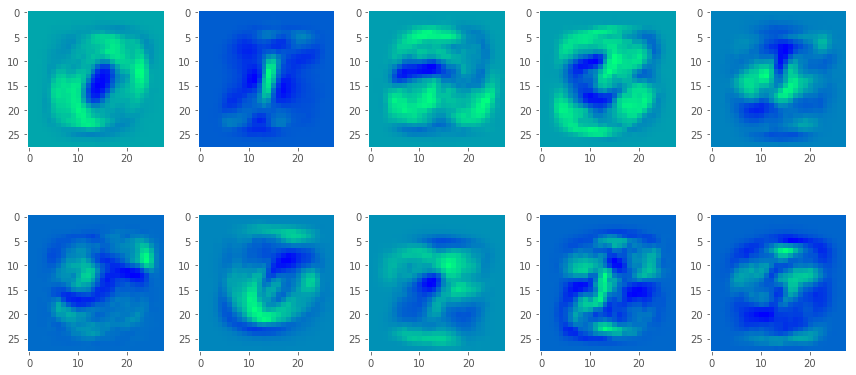

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for digit, ax in enumerate(axs.flatten()):
    plot_digit_weights(ax, digit)

remove_grid_lines(axs)
plt.tight_layout()

## Training a Network with One Hidden Layer

Train a fully connected network with one hidden layer.  Your architecture should be like that displayed in the following schematic:

![Fully Connected Network with One Hidden Layer](img/nn-fc-hidden.png)

You can choose the number of hidden layers to use (24 is a good default choice).

**Notes and Suggestions:**
  - If you initilize your weights to zero, your network may have trouble converging.  Try instead using `tf.truncated_normal` to initilize your weights to small positive numbers.
  - You may want to consider adding regularization to your loss function using `tf.nn.l2_loss`.
  - After training your network, it will be interesting to plot the weights associated with each hidden unit, just like we did for our previous network.

In [19]:
# Placeholder for the input data, grayscale images.
x = tf.placeholder(tf.float32, [None, 28*28])
# Placeholder for input class labels.
y = tf.placeholder(tf.float32, [None, 10])

n_hidden_layers = 28
n_output_classes = 10

# Fist Layer.
weights_hidden_layer = tf.Variable(tf.truncated_normal(
        shape=[28*28, n_hidden_layers], stddev=0.1))
bias_hidden_layer = tf.Variable(tf.constant(0.1, shape=[n_hidden_layers]))
linear_hidden_layer = tf.matmul(x, weights_hidden_layer) + bias_hidden_layer
output_hidden_layer = tf.nn.relu(linear_hidden_layer)

# Second Layer.
weights_output_layer = tf.Variable(
    tf.truncated_normal(shape=[n_hidden_layers, n_output_classes], stddev=0.1))
bias_output_layer = tf.Variable(tf.constant(0.1, shape=[n_output_classes]))
y_hat = tf.nn.softmax(tf.matmul(output_hidden_layer, weights_output_layer) + bias_output_layer)

In [20]:
# Raw loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=[1]))

# Reguarization
regularization_strength = 0.01
regularization_term = regularization_strength * (
    tf.nn.l2_loss(weights_hidden_layer) +
    tf.nn.l2_loss(weights_output_layer)
)

In [21]:
# Train the model by gradient descent, for a fixed 1000 iterations.
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

prediction = tf.argmax(y_hat, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.global_variables_initializer().run()
for i in range(200000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})
    if i % 5000 == 0:
        print("Train Error Accuracy: {:0.3f}".format(
            sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys})))

Train Error Accuracy: 0.080
Train Error Accuracy: 0.930
Train Error Accuracy: 0.950
Train Error Accuracy: 0.900
Train Error Accuracy: 0.930
Train Error Accuracy: 0.940
Train Error Accuracy: 0.950
Train Error Accuracy: 0.910
Train Error Accuracy: 0.950
Train Error Accuracy: 0.990
Train Error Accuracy: 0.980
Train Error Accuracy: 0.950
Train Error Accuracy: 0.960
Train Error Accuracy: 0.980
Train Error Accuracy: 0.980
Train Error Accuracy: 0.970
Train Error Accuracy: 0.980
Train Error Accuracy: 0.960
Train Error Accuracy: 0.980
Train Error Accuracy: 0.990
Train Error Accuracy: 0.970
Train Error Accuracy: 0.990
Train Error Accuracy: 0.980
Train Error Accuracy: 0.990
Train Error Accuracy: 0.980
Train Error Accuracy: 0.970
Train Error Accuracy: 0.970
Train Error Accuracy: 0.970
Train Error Accuracy: 0.990
Train Error Accuracy: 0.990
Train Error Accuracy: 1.000
Train Error Accuracy: 0.990
Train Error Accuracy: 0.990
Train Error Accuracy: 0.980
Train Error Accuracy: 0.960
Train Error Accuracy

In [22]:
print("Test Error Accuracy: {:0.3f}".format(
        sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})))

Test Error Accuracy: 0.969


In [23]:
def plot_hidden_layer_weights(ax, layer_idx):
    """Plot the weights from our fit fully connected network as an image."""
    layer_weights = weights_hidden_layer.eval()[:, layer_idx].reshape(28, 28)
    ax.imshow(layer_weights, cmap=plt.cm.winter, interpolation="nearest")

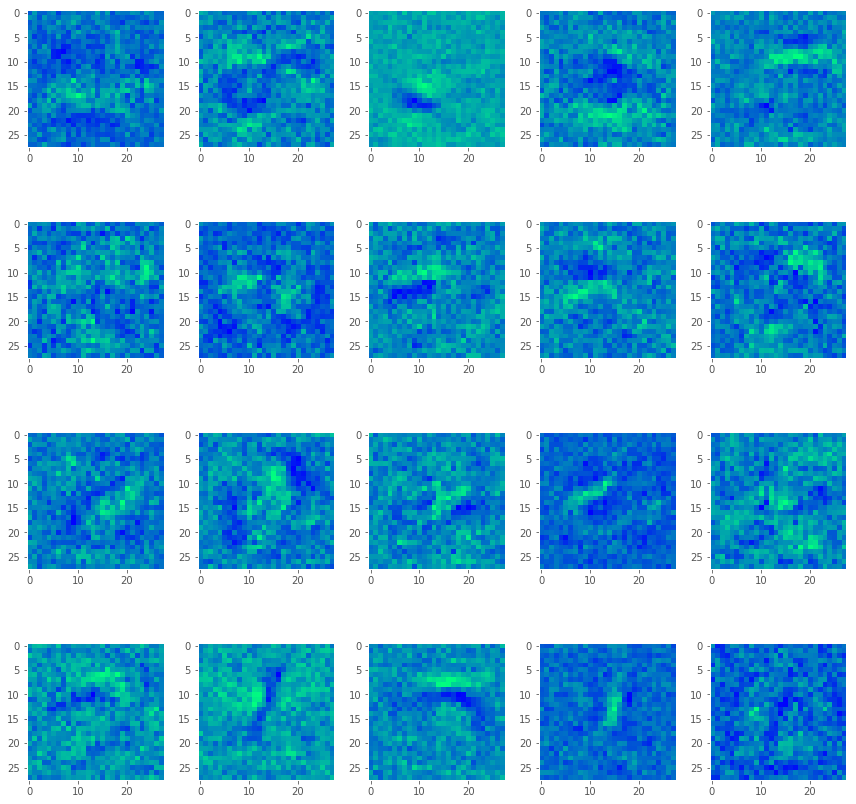

In [24]:
fig, axs = plt.subplots(4, 5, figsize=(12, 12))

for idx, ax in enumerate(axs.flatten()):
    plot_hidden_layer_weights(ax, idx)

remove_grid_lines(axs)
plt.tight_layout()

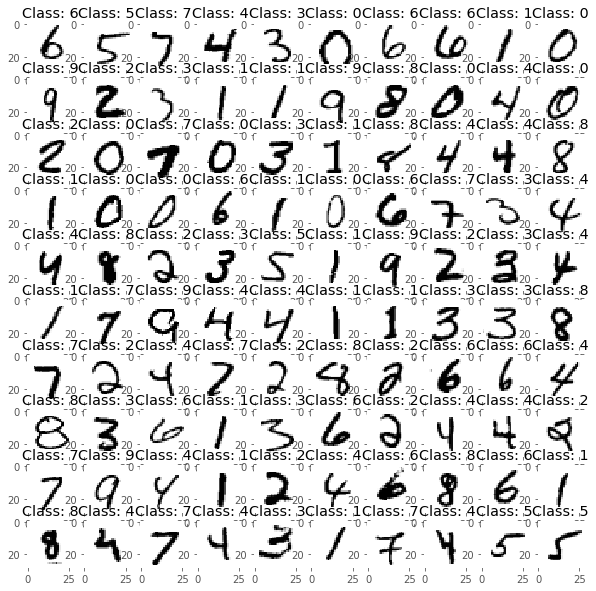

In [25]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))

digit_labels = np.argmax(mnist.train.labels, axis=1)

for i, (image, label, ax) in enumerate(
    zip(mnist.train.images, digit_labels, axs.flatten())):
    plot_mnist_digit(ax, image, label)
    
remove_grid_lines(axs)